# <p><h1><font color = DarkBlue> Heart Disease Case Study </font></h1></p>


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_score, recall_score, roc_curve,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hd=pd.read_csv("heart.csv")

In [3]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Dataset Description 
age: age in years
sex: sex (1 = male; 0 = female)
cp: chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak : ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
target: diagnosis of heart disease (angiographic disease status)
Value 0: < 50% diameter narrowing
Value 1: > 50% diameter narrowing

In [4]:
hd.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
hd.info()
#there is no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# Exploratory Data Analysis 

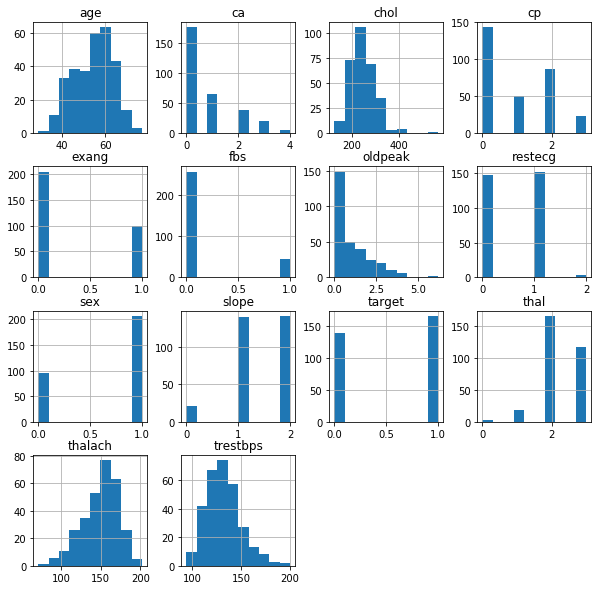

In [6]:
# create a histogram for all numeric variables 
hd.hist(figsize=(10,10));

In [7]:
hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Creating Feature Matrix, Target Array and splitting into Train and Test Dataset

In [8]:
y=hd['target']

In [9]:
x=hd.drop(['target'], axis = 1)

In [10]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42,stratify=y)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [13]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

# Finding baseline model  and other building model

In [14]:
hd.target.value_counts()  

1    165
0    138
Name: target, dtype: int64

In [15]:
165/303

0.5445544554455446

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
# Building a model using all variables with max_depth = 4
hd_model = DecisionTreeClassifier(max_depth=4)

In [18]:
hd_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
from sklearn.tree import export_graphviz
from IPython.display import Image

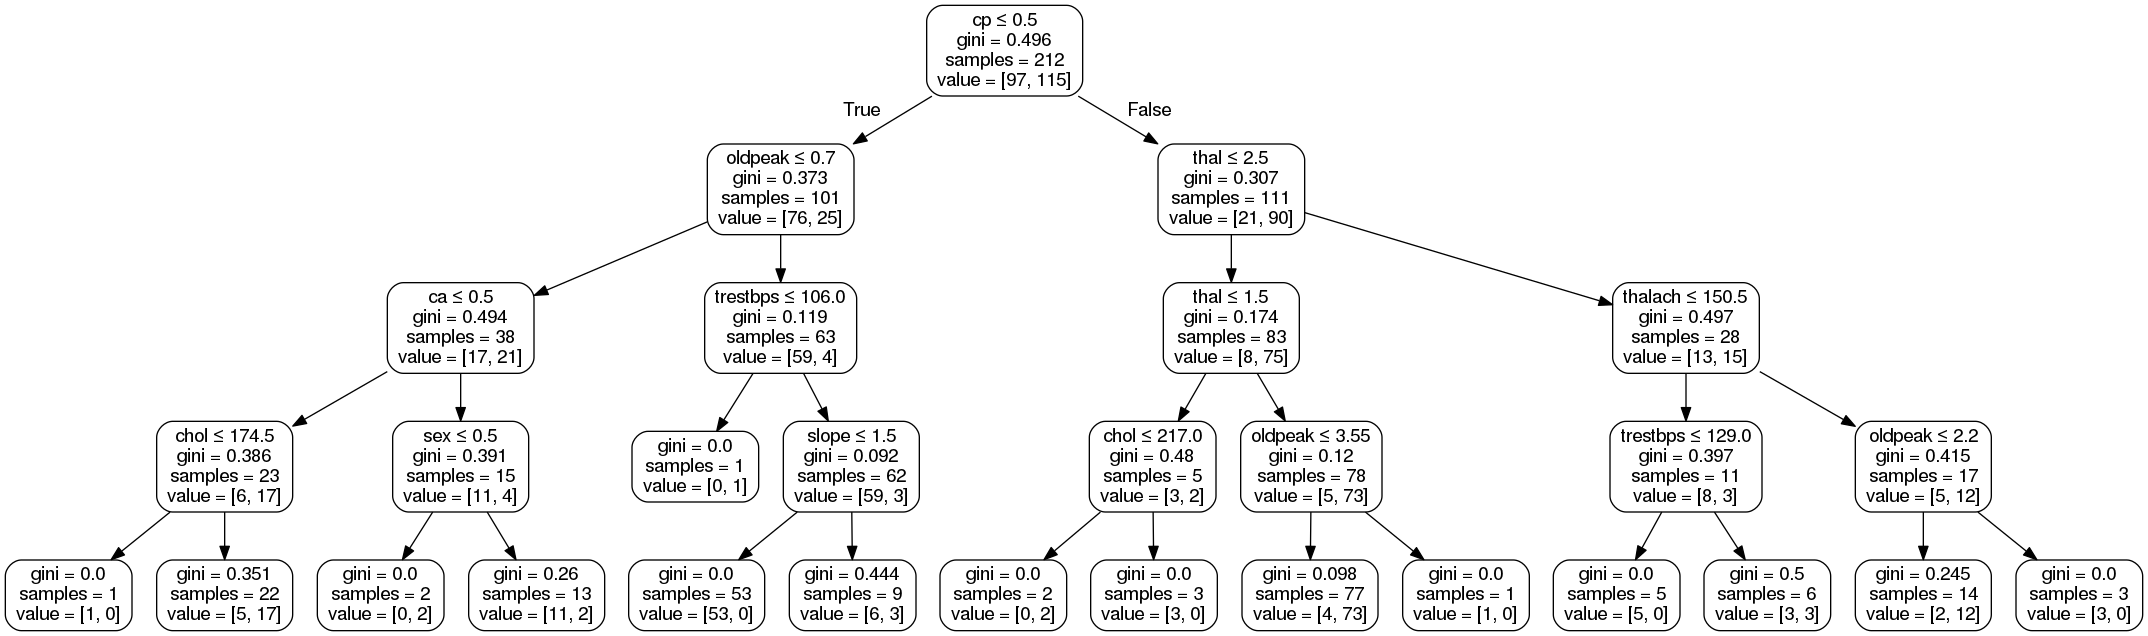

In [20]:
export_graphviz(hd_model, out_file='clf_tree.dot',filled=False, rounded=True,special_characters=True,feature_names=x_train.columns)
! dot -Tpng clf_tree.dot -o clf_tree.png
Image("clf_tree.png")


In [21]:
hd_model.score(x_train,y_train)   # accuracy score of the model

0.910377358490566

In [22]:
y_train_pred=hd_model.predict(x_train)  #predict on train data

In [23]:
accuracy_score(y_train_pred,y_train)

0.910377358490566

In [24]:
confusion_matrix(y_train_pred,y_train)

array([[ 86,   8],
       [ 11, 107]])

# predict on test  data

In [25]:
y_test_pred=hd_model.predict(x_test)

In [26]:
accuracy_score(y_test_pred,y_test)

0.7582417582417582

In [27]:
confusion_matrix(y_test_pred,y_test)

array([[28,  9],
       [13, 41]])

In [28]:
sensitivity = 42/(42+11)
sensitivity

0.7924528301886793

In [29]:
specificity = 30/(30+8)
specificity

0.7894736842105263

# Plotting ROC curve and Finding AUC 

In [30]:
pred_prob = hd_model.predict_proba(x_test)

In [31]:
pred_prob[:5]

array([[0.05194805, 0.94805195],
       [0.22727273, 0.77272727],
       [1.        , 0.        ],
       [0.22727273, 0.77272727],
       [0.05194805, 0.94805195]])

In [32]:
fpr,tpr,t = roc_curve(y_test,pred_prob[:,1],pos_label=1)
print(fpr)
print(tpr)
print(t)

[0.         0.02439024 0.2195122  0.26829268 0.31707317 0.36585366
 0.43902439 0.58536585 1.        ]
[0.   0.04 0.6  0.68 0.82 0.82 0.84 0.84 1.  ]
[2.         1.         0.94805195 0.85714286 0.77272727 0.5
 0.33333333 0.15384615 0.        ]


In [33]:
t[0] = 1
print(t)

[1.         1.         0.94805195 0.85714286 0.77272727 0.5
 0.33333333 0.15384615 0.        ]


Text(0, 0.5, 'tpr')

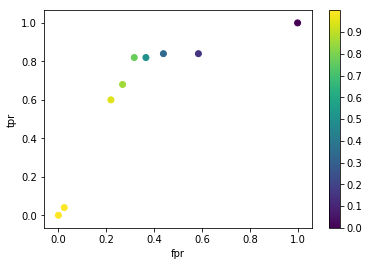

In [34]:
plt.scatter(fpr,tpr,c=t)
plt.colorbar(ticks=np.arange(0,1,0.1))
plt.xlabel('fpr')
plt.ylabel('tpr')

[[(0.0, 0.0), (0.024390243902439025, 0.04)], [(0.024390243902439025, 0.04), (0.21951219512195122, 0.6)], [(0.21951219512195122, 0.6), (0.2682926829268293, 0.68)], [(0.2682926829268293, 0.68), (0.3170731707317073, 0.82)], [(0.3170731707317073, 0.82), (0.36585365853658536, 0.82)], [(0.36585365853658536, 0.82), (0.43902439024390244, 0.84)], [(0.43902439024390244, 0.84), (0.5853658536585366, 0.84)], [(0.5853658536585366, 0.84), (1.0, 1.0)]]


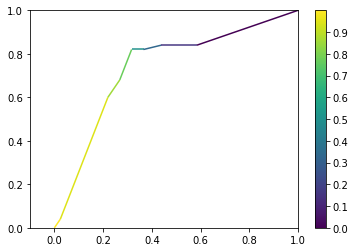

In [35]:
from matplotlib.collections import LineCollection
import matplotlib as mpl
l1 = []
for i in range(len(fpr)-1):
    l1.append([(fpr[i],tpr[i]),(fpr[i+1],tpr[i+1])])
print(l1)

lc = LineCollection(l1, cmap='viridis')
fig, ax = plt.subplots()
line=ax.add_collection(lc)
lc.set_array(t[1:])

plt.axis([-0.1,1,0,1])
plt.colorbar(line, ticks=np.arange(0,1,0.1))
plt.show()

In [36]:
pred1_06=np.where(pred_prob[:,1]>=0.7,1,0) ##predict on test data with treshold
pred1_06

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1])

In [37]:
confusion_matrix(y_test,pred1_06)

array([[28, 13],
       [ 9, 41]])

In [38]:
accuracy_score(y_test,pred1_06)

0.7582417582417582

In [39]:
pred_prob1 = hd_model.predict_proba(x_train) ##predict on test data with treshold

In [40]:
pred1_01=np.where(pred_prob1[:,1]>=0.7,1,0) ##predict on test data with treshold
pred1_01

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [41]:
accuracy_score(y_train,pred1_01)

0.910377358490566

In [42]:
confusion_matrix(y_train,pred1_01)

array([[ 86,  11],
       [  8, 107]])

# Pruning the Model 

In [43]:
model1 = DecisionTreeClassifier(max_depth=4,random_state=100)
model1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [44]:
parameters = {'max_depth': [1,2,3,4,5,6,7,8]}   # hyperparameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
grid = GridSearchCV(hd_model,parameters,cv=10,return_train_score=False,scoring='accuracy')

In [47]:
grid.fit(x_train,y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [48]:
grid.best_params_

{'max_depth': 3}

In [49]:
grid.best_score_

0.8018867924528302

In [50]:
model_prune=DecisionTreeClassifier(max_depth=3,random_state=42)

In [51]:
model_prune.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [52]:
model_prune.score(x_train,y_train)

0.8679245283018868

In [53]:
model_prune.feature_importances_

array([0.        , 0.        , 0.54469805, 0.02893084, 0.        ,
       0.        , 0.        , 0.04067801, 0.        , 0.18410161,
       0.        , 0.0657903 , 0.13580119])

In [54]:
data = pd.Series(data=model_prune.feature_importances_,index=x.columns)


In [55]:
data.sort_values(ascending=True,inplace=True)

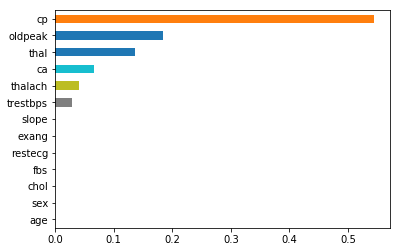

In [56]:
data.plot.barh()

In [57]:
pred_test = model_prune.predict(x_test)    #prediction on test data
pred_test

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1])

In [58]:
confusion_matrix(y_test,pred_test)

array([[28, 13],
       [10, 40]])

In [59]:
accuracy_score(y_test,pred_test)

0.7472527472527473

In [60]:
print(classification_report(y_test,pred_test))


              precision    recall  f1-score   support

           0       0.74      0.68      0.71        41
           1       0.75      0.80      0.78        50

   micro avg       0.75      0.75      0.75        91
   macro avg       0.75      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91



In [61]:
sensitivity = 40/(40+10)
sensitivity

0.8

In [62]:
specificity = 28/(28+13)
specificity

0.6829268292682927